<a href="https://colab.research.google.com/github/tistZ25/Machine_Learning_Projects/blob/main/Project1_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies:

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [8]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162552,115210.0,2.114128,-1.104488,0.415559,-0.749874,-1.717262,-0.387432,-1.560780,-0.004930,0.436754,...,0.441625,1.448872,0.180504,0.118535,-0.375367,-0.098409,0.065220,-0.028177,9.99,0.0
162553,115211.0,1.972488,0.052897,-1.960439,1.080410,0.922172,-0.136797,0.498360,-0.142762,-0.011417,...,0.080830,0.313451,-0.057854,0.220695,0.490273,-0.515163,-0.030846,-0.065219,37.40,0.0
162554,115211.0,1.957099,-0.564585,-0.336281,0.229964,-0.691445,-0.115662,-0.769791,0.098782,1.052559,...,0.247960,0.897746,0.074085,-0.261071,-0.246790,0.741045,-0.033620,-0.061522,17.90,0.0
162555,115211.0,1.850556,-0.850150,-1.826873,-0.526510,1.710747,3.824289,-1.112847,0.998865,0.863568,...,0.229472,0.534459,0.156911,0.742622,-0.274273,0.369661,-0.006685,-0.038230,76.50,0.0
162556,115211.0,-0.694980,0.247120,2.074755,-0.017298,-0.215007,-0.235263,-0.037201,0.164253,0.247815,...,0.220919,0.645922,-0.408868,-0.055975,0.384300,1.057126,0.000000,NaN,NaN,NaN


In [11]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162557 entries, 0 to 162556
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    162557 non-null  float64
 1   V1      162557 non-null  float64
 2   V2      162557 non-null  float64
 3   V3      162557 non-null  float64
 4   V4      162557 non-null  float64
 5   V5      162557 non-null  float64
 6   V6      162557 non-null  float64
 7   V7      162557 non-null  float64
 8   V8      162557 non-null  float64
 9   V9      162557 non-null  float64
 10  V10     162557 non-null  float64
 11  V11     162557 non-null  float64
 12  V12     162557 non-null  float64
 13  V13     162557 non-null  float64
 14  V14     162557 non-null  float64
 15  V15     162557 non-null  float64
 16  V16     162557 non-null  float64
 17  V17     162557 non-null  float64
 18  V18     162557 non-null  float64
 19  V19     162557 non-null  float64
 20  V20     162557 non-null  float64
 21  V21     16

In [12]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64

In [13]:
credit_card_data.shape

(162557, 31)

In [14]:
# analyse the distribution of data in the v18 column
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-15-a73d5e7bc977>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data.V28)


<Axes: xlabel='V28', ylabel='Density'>

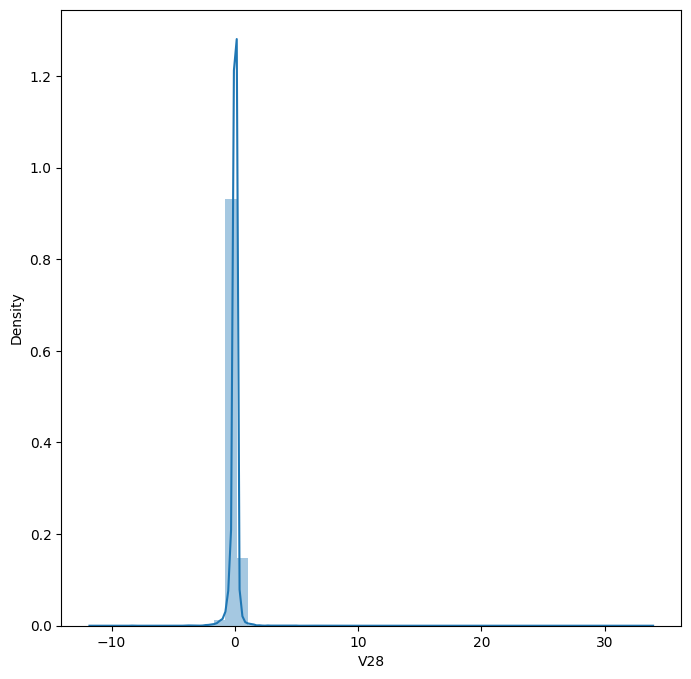

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(credit_card_data.V28)

In [16]:
credit_card_data['V28'].fillna(credit_card_data['V28'].median(),inplace=True)
credit_card_data['Amount'].fillna(credit_card_data['Amount'].median(),inplace=True)
credit_card_data['Class'].fillna(credit_card_data['Class'].median(),inplace=True)

In [17]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# very less data points for fraudulant transaction

This Dataset is highly unbalanced

0 --> Normal Transaction

1 --> Fraudulant Transaction

In [18]:
# seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [19]:
print(legit.shape)
print(fraud.shape)

(162201, 31)
(356, 31)


In [20]:
# statistical measures of the data
legit.Amount.describe()

count    162201.000000
mean         86.929438
std         244.399481
min           0.000000
25%           5.380000
50%          21.350000
75%          76.070000
max       19656.530000
Name: Amount, dtype: float64

In [21]:
fraud.Amount.describe()

count     356.000000
mean      112.005000
std       228.517058
min         0.000000
25%         1.000000
50%         9.905000
75%       102.125000
max      1809.680000
Name: Amount, dtype: float64

In [22]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,58176.720550,-0.185444,0.042135,0.569689,0.124499,-0.191311,0.067595,-0.076600,0.038895,0.027552,...,0.032755,-0.036009,-0.096154,-0.025342,0.010510,0.103689,0.014088,0.001871,0.002442,86.929438
1.0,55968.873596,-6.057284,4.419181,-8.006879,4.902106,-4.402531,-1.445960,-7.057336,0.778068,-2.884994,...,0.413879,0.767732,-0.017997,-0.045050,-0.073773,0.080805,0.036841,0.181541,0.044143,112.005000


Under - Sampling


Build a sample dataset containing similar distribution of normal transactions and Fraudulant Transactions

The Number of Fraudulant transactions: 356

In [23]:
legit_sample = legit.sample(n=356)

Concatenating two DataFrames

In [24]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130752,79423.0,1.203280,-0.436962,0.871063,-0.769549,-1.072654,-0.368132,-0.687846,0.136735,1.901300,...,0.008941,0.283483,0.000497,0.082951,0.408657,-0.655035,0.106521,0.030699,1.00,0.0
125517,77700.0,1.219388,0.560330,-0.475506,0.812431,0.006552,-1.267116,0.264263,-0.144057,-0.334000,...,-0.096940,-0.293571,-0.062173,0.404417,0.489581,0.341182,-0.038846,0.033249,0.76,0.0
60175,49194.0,1.049940,-0.686612,1.270384,0.363346,-1.747551,-0.795298,-0.740351,0.116135,1.378808,...,-0.068193,-0.263105,0.094342,0.950079,-0.057071,0.957140,-0.060247,0.028700,74.95,0.0
144891,86467.0,2.127745,0.030464,-1.798252,0.047973,0.747801,-0.368642,0.246534,-0.294347,0.474778,...,0.205625,0.778376,-0.074587,-0.022843,0.416736,-0.092877,-0.016018,-0.057584,4.78,0.0
77491,57074.0,1.139672,-0.325697,0.733771,0.435837,-0.261809,1.176973,-0.778320,0.406960,0.687069,...,-0.072854,-0.037631,-0.117777,-1.089209,0.313146,0.397682,0.026777,0.006174,28.75,0.0


In [26]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
156990,109298.0,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,...,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1.0
157585,110087.0,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,0.508730,...,-0.173602,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1.00,1.0
157868,110547.0,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,-1.465542,...,0.632505,-0.070838,-0.490291,-0.359983,0.050678,1.095671,0.471741,-0.106667,0.76,1.0
157871,110552.0,-2.450367,2.107729,-5.140663,1.411304,-1.690780,-0.736427,-3.657946,1.944906,-0.788388,...,0.800538,0.364617,0.233608,-0.282078,-0.320311,0.492920,0.359976,-0.115471,80.22,1.0
157918,110617.0,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,...,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,635.10,1.0


In [27]:
print(new_dataset.shape)

(712, 31)


In [28]:
new_dataset['Class'].value_counts()

0.0    356
1.0    356
Name: Class, dtype: int64

In [29]:
# compare the values for both transactions
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,58776.292135,-0.192000,-0.067311,0.583031,0.271871,-0.118460,0.083658,-0.071718,0.078028,0.070490,...,-0.082698,-0.021050,-0.072292,0.011953,-0.013225,0.130389,0.020834,-0.030605,0.072030,74.292556
1.0,55968.873596,-6.057284,4.419181,-8.006879,4.902106,-4.402531,-1.445960,-7.057336,0.778068,-2.884994,...,0.413879,0.767732,-0.017997,-0.045050,-0.073773,0.080805,0.036841,0.181541,0.044143,112.005000


Splitting the data into Features & Targets

In [30]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [31]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
130752   79423.0  1.203280 -0.436962  0.871063 -0.769549 -1.072654 -0.368132   
125517   77700.0  1.219388  0.560330 -0.475506  0.812431  0.006552 -1.267116   
60175    49194.0  1.049940 -0.686612  1.270384  0.363346 -1.747551 -0.795298   
144891   86467.0  2.127745  0.030464 -1.798252  0.047973  0.747801 -0.368642   
77491    57074.0  1.139672 -0.325697  0.733771  0.435837 -0.261809  1.176973   
...          ...       ...       ...       ...       ...       ...       ...   
156990  109298.0 -1.000611  3.346850 -5.534491  6.835802 -0.299803  0.095951   
157585  110087.0  1.934946  0.650678 -0.286957  3.987828  0.316052 -0.099449   
157868  110547.0 -1.532810  2.232752 -5.923100  3.386708 -0.153443 -1.419748   
157871  110552.0 -2.450367  2.107729 -5.140663  1.411304 -1.690780 -0.736427   
157918  110617.0 -1.101035 -1.674928 -0.573388  5.617556  0.765556  0.440607   

              V7        V8        V9  .

In [32]:
print(Y)

130752    0.0
125517    0.0
60175     0.0
144891    0.0
77491     0.0
         ... 
156990    1.0
157585    1.0
157868    1.0
157871    1.0
157918    1.0
Name: Class, Length: 712, dtype: float64


Split the data into training data & testing data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(712, 30) (569, 30) (143, 30)


Model Training

In [35]:
model = LogisticRegression()

In [36]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [37]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
trining_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print('Accuracy on Training data: ',trining_data_accuracy)

Accuracy on Training data:  0.9314586994727593


In [39]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print('Accuracy on Test data: ',test_data_accuracy)

Accuracy on Test data:  0.958041958041958


test_data_accuracy > triaining data accuracy
mean the Model is Under Fitted. It over-generaise the learning

Here it is very similar, so very good accuracy